In [1]:
import open3d as o3d
import numpy as np
import colour
from pint import UnitRegistry
import matplotlib.pyplot as plt

# Test Hidden Points Removal Using RU Geomuseum Point Cloud

In [ ]:
pcd = o3d.io.read_point_cloud("test_scan_100000.pcd")

print(pcd)
print(np.asarray(pcd.points))
#o3d.visualization.draw_geometries([pcd])

In [ ]:
diameter = np.linalg.norm(np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

In [ ]:
pcd = o3d.io.read_point_cloud("RUGeoMuseum_2.pts")
print(pcd)
print(np.asarray(pcd.points))

In [ ]:
min_bound = np.asarray(pcd.get_max_bound())
min_bound

In [ ]:
max_bound = np.asarray(pcd.get_min_bound())
max_bound

In [ ]:
mid_position = (min_bound + max_bound) / 2
mid_position

In [ ]:
camera = [6.317, -2.375, -57.286]
radius = 5

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd2 = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd2])

# Register Point Cloud from Virtual Scans

In [ ]:
import os

In [ ]:
dir_name = "test_scan/"

scan_config = (0, 3.5, 100)

scan_loc = np.linspace(scan_config[0], scan_config[1], scan_config[2])
    
Pcd = o3d.geometry.PointCloud()

n = 0
for i in range(scan_config[2]):
    temp = o3d.io.read_point_cloud("test_scan/test_scan_%d00000.pcd" % (i))
    temp.translate((0,scan_loc[n],0))
    Pcd += temp
    n += 1
    
print(np.asarray(Pcd))

In [ ]:
o3d.visualization.draw_geometries([Pcd])

# UVC Visibility Analysis using Mesh-Generated Point Cloud

In [2]:
mesh = o3d.io.read_triangle_mesh("bedroom.stl")
mesh.compute_vertex_normals()
print(mesh)

geometry::TriangleMesh with 198489 points and 66163 triangles.


In [3]:
mesh_box = o3d.geometry.TriangleMesh.create_box(width=1.0,
                                                height=1.0,
                                                depth=1.0)
mesh_box.paint_uniform_color([0.9, 0.1, 0.1])
mesh_box.compute_vertex_normals()
mesh_box.translate([-10, 0, 0])

geometry::TriangleMesh with 8 points and 12 triangles.

In [4]:
o3d.visualization.draw_geometries(
        [mesh_box, mesh])

In [5]:
mesh_comb = mesh + mesh_box

In [6]:
o3d.visualization.draw_geometries([mesh_comb])

In [7]:
Total_points = 500000

pcd = mesh_comb.sample_points_poisson_disk(Total_points)
diameter = np.linalg.norm(np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

In [8]:
cropped = pcd.crop(mesh_box.get_oriented_bounding_box())
o3d.visualization.draw_geometries([cropped])

# cropped2 = pcd.crop(mesh_box.get_axis_aligned_bounding_box())
# o3d.visualization.draw_geometries([cropped])

In [9]:
len(np.asarray(cropped.points))

4801

In [8]:
ureg = UnitRegistry()

In [11]:
a = (1 * ureg.feet).to('meter') * (1 * ureg.feet).to('meter')
area_per_point = a * 6 / len(np.asarray(cropped.points))
area_per_point

0.00011610461153926261 <Unit('meter ** 2')>

In [ ]:
camera = [1, 0, 0.5]
radius = 4

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd_cam = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd_cam])

In [ ]:
Pcd = o3d.geometry.PointCloud()

for i in np.linspace(0, 3, 6):
    camera = [1, i, 1]
    
    _, pt_map = pcd.hidden_point_removal(camera, radius)

    pcd_cam = pcd.select_by_index(pt_map)
    
    Pcd += pcd_cam
    
o3d.visualization.draw_geometries([Pcd, mesh_box])

In [ ]:
Pcd

In [ ]:
Pcd = o3d.geometry.PointCloud()

Pcd_set = set()

for i in np.linspace(0, 3, 6):
    camera = [1, i, 1]
    
    _, pt_map = pcd.hidden_point_removal(camera, 3)

    pcd_temp = pcd.select_by_index(pt_map)
    
    pcd_temp_set = set(map(tuple, np.asarray(pcd_temp.points)))
    
    Pcd_set = Pcd_set.union(pcd_temp_set)
    
Pcd_2nparray = np.array(list(Pcd_set))

Pcd.points = o3d.utility.Vector3dVector(Pcd_2nparray)

o3d.visualization.draw_geometries([Pcd])

In [ ]:
Pcd

# Calculate UVC Light Dose

## Model 1

Product Name: ClorDiSys Lantern UV Disinfection System

Input Wattage: 110V * 4A = 440W
Irradiance: 150 micro watt per square centimeter at 4 feet  (1.5  watt/m2, x = 1.219 m) <br>
Irradiance: 22  micro watt per square centimeter at 10 feet (0.22 watt/m2, x = 3.048 m)

Since UV Light ***Intensity (I)*** is the total amount of energy, it is eqaual to the product between the ***irradiance (i)*** and the area of a sphere with its radius equal to the ***distance (x > 0)***:

\begin{align}
I = i \cdot 4 \pi x^2
\end{align}

On the other hand, UV Light ***Intensity (I)*** is inversely proportional to the square of ***distance (x)***:

\begin{align}
I = \frac{1}{a(x)^2 + bx + c}
\end{align}

where, ***a***, ***b*** and ***c*** are constants. (see ***Nvidia Computer Graphic Tutorial Chapter 5.5.1: Distance Attenuation:***) 
https://developer.download.nvidia.com/CgTutorial/cg_tutorial_chapter05.html

http://csis.pace.edu/~marchese/CG_Rev/Lect10New/cg_l10new.htm

For a UV Light source, the constants in the function can be calculated if two points including ***distance (x)*** and ***irradiance (i)*** are measured and its output ***wattage (P)***, which is equal to the ***Intensity (I)*** at ***distance (x)*** 0. Hence,

\begin{align}
i_1 \cdot 4\pi x_1^2 = \frac{1}{ax_1^2 + bx_1 + c}, x > 0  \\
i_2 \cdot 4\pi x_2^2 = \frac{1}{ax_2^2 + bx_2 + c}, x > 0  \\
P = \frac{1}{a \cdot 0^2 + b \cdot 0 + c} = \frac{1}{c}, x = 0
\end{align}

Then plug in the following data:
\begin{align}
1.5 \cdot 4\pi \cdot 1.1219^2 = \frac{1}{a \cdot 1.1219^2 + b \cdot 1.1219 + c}  \\
0.22 \cdot 4\pi \cdot 3.048^2 = \frac{1}{a \cdot 3.048^2 + b \cdot 3.048 + c}  \\
400 = \frac{1}{a \cdot 0^2 + b \cdot 0 + c} = \frac{1}{c}
\end{align}

Therefore,
\begin{align}
a = −0.0084,
b = 0.0377,
c = 0.00227
\end{align}

In [20]:
P = 1 * ureg.watt

i1 = 1.5 * ureg.watt / (ureg.meter * ureg.meter)
x1 = (4 * ureg.feet).to('meter')

i2 = 0.22 * ureg.watt / (ureg.meter * ureg.meter)
x2 = (10 * ureg.feet).to('meter')

In [26]:
c = 1 / P

b = (1/(i2 * 4 * np.pi * x2**2) - x2**2/(i1 * 4 * np.pi * x1**4) + c * (x2**2/x1**2 - 1)) / (x2 - x2**2/x1)

a = 1 / (i1 * 4 * np.pi * x1**4) - b / x1 - c / x1**2

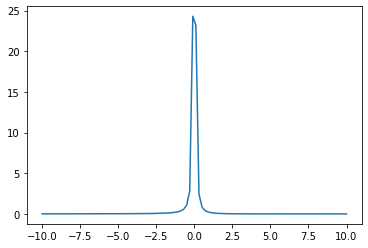

In [29]:
Q_ = ureg.Quantity
P = Q_(np.linspace(-10, 10, 100), 'watt')

delta = b**2 - 4 * a * c

plt.plot(P, delta)

In [18]:
def IA(x):
    I = 1 / (c + b*x + a*x**2)
    return(I)

IA(1.219 * ureg.meter) / 4 / np.pi / 1.219**2

1.5005631498293592 <Unit('watt')>

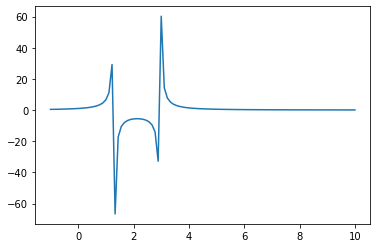

In [22]:
Q_ = ureg.Quantity
x = Q_(np.linspace(-1, 10, 100), 'meter')
y = 1 / (c + b*x + a*x**2)

plt.plot(x, y)

### Comment on Model 1

Model 1 is widely implemented in computer graphics and it is usually combined with other surface lighting effects such as "diffuse reflection", "specular reflection" and "ambient" to compute lightings. It is noted that Model 1 can only be used as a local shading model and the light intensity factor is always considered as 1 if the object is infinitely distant from the light source.

According to the plot, the delta value (graph out[29]) in the denominator is always greater thant 0. Once the polynomial equation (the denominator) has roots, the intensity attenuation is not realistically true (graph out[22]).

## Model 2

Since UV Light ***Intensity (I)*** is the total amount of energy, it is eqaual to the product between the ***irradiance (i)*** and the area of a sphere with its radius equal to the ***distance (x > 0)***:

\begin{align}
I = i \cdot 4 \pi x^2
\end{align}

On the other hand, UV Light ***Intensity (I)*** is inversely proportional to the square of ***distance (x)***:

\begin{align}
I = k \cdot \frac{1}{x^2} + b
\end{align}

In [57]:
I_max = k * 1 / (r**2) + b
I_max

1677.9634899188682 <Unit('watt')>

In [30]:
r = 0.05 * ureg.meter

i1 = 1.5 * ureg.watt / (ureg.meter * ureg.meter)
x1 = (4 * ureg.feet).to('meter')

i2 = 0.22 * ureg.watt / (ureg.meter * ureg.meter)
x2 = (10 * ureg.feet).to('meter')

In [31]:
k = (i1 * (4 * np.pi * (x1)**2) - i2 * (4 * np.pi * (x2)**2)) / (1 / x1**2 - 1 / x2**2)
b = i1 * (4 * np.pi * (x1)**2) - k * (1 / x1**2)

print(k, b)

4.131810614028642 meter ** 2 * watt 25.239244307411813 watt


In [32]:
Q_ = ureg.Quantity
x = Q_(np.linspace(0.5, 10, 100), 'meter')
Intensity = k * (1 / np.square(x)) + b
irradiance = Intensity / (4 * np.pi * (x**2))

Text(0, 0.5, 'UV Irradiance (watt/m2)')

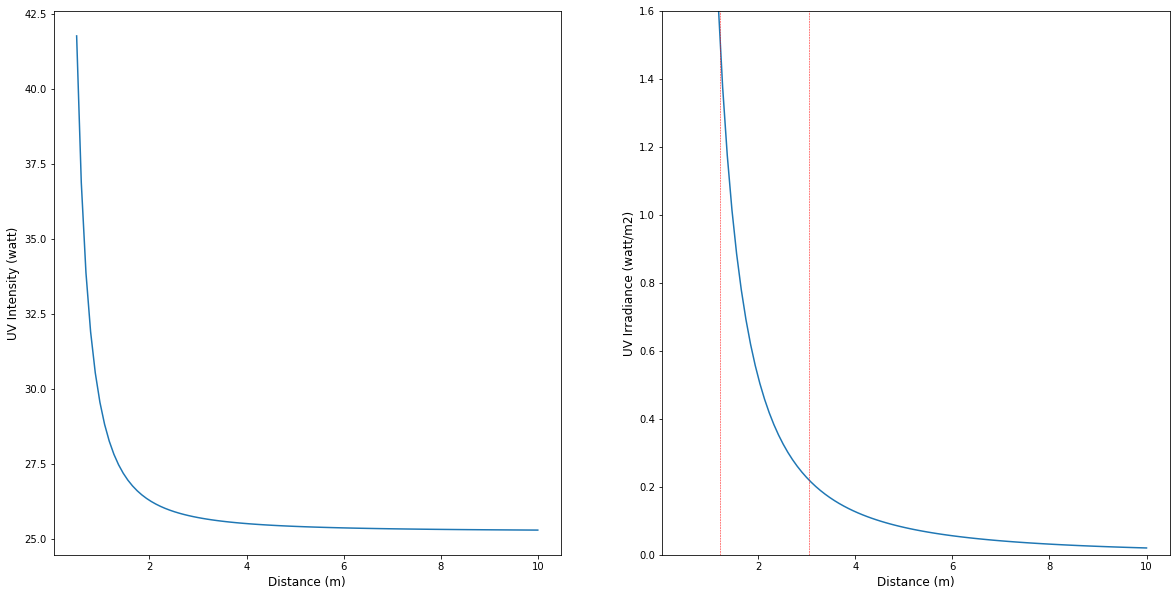

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10))

ax[0].plot(x, Intensity)
ax[1].plot(x, irradiance)
ax[1].plot([x1.magnitude, x1.magnitude], [0, 2], '--r', linewidth = 0.5)
ax[1].plot([x2.magnitude, x2.magnitude], [0, 2], '--r', linewidth = 0.5)

ax[1].set_ylim(0, 1.6)

ax[0].set_xlabel("Distance (m)", fontsize=12)
ax[1].set_xlabel("Distance (m)", fontsize=12)
ax[0].set_ylabel("UV Intensity (watt)", fontsize=12)
ax[1].set_ylabel("UV Irradiance (watt/m2)", fontsize=12)

### Comment on Model 2

Model 2 is the simplest version to fit the light intensity attenuation curve. The major disadvantage of this model is: the intensity close to light source is not restricted (out[57]: the intensity of a point close to the UV light is about 1977.9 watt, which is not true in reality). In fact, the intensity at distance equal to 0 should be the output wattage of UV light. As a result, Model 2.1 aims to solve the major issue in Model 2.

## Model 2.1

Model 2.1 is a variation of Model 2, in order to constrain the maximum light intensity at distance equal to 0, a constant ***c*** is added in order to shift the curve to the left to guarrantee an intersection between the curve and y-axis. The value of the intersection is the output wattage of the UV light.

The relationship between ***Intensity (I)*** and ***irradiance (i)***:
\begin{align}
I = i \cdot 4 \pi x^2
\end{align}

Shift the function along the negative x-axis direction:
\begin{align}
I = k \cdot \frac{1}{(x+c)^2} + b
\end{align}

Plug in data points:

\begin{align}
I_1 = i_1 \cdot 4\pi x_1 = k \cdot \frac{1}{(x_1+c)^2} + b, x>0
\end{align}
\begin{align}
I_2 = i_2 \cdot 4\pi x_2 = k \cdot \frac{1}{(x_2+c)^2} + b, x>0
\end{align}
\begin{align}
P = k \cdot \frac{1}{c^2} + b, x=0
\end{align}

Substitute ***b***:

\begin{align}
I_1-P = k \cdot (\frac{1}{(x_1+c)^2} - \frac{1}{c})
\end{align}
\begin{align}
I_2-P = k \cdot (\frac{1}{(x_2+c)^2} - \frac{1}{c})
\end{align}

as long as x > 0, ***Intensity (I)*** is not equal to ***output wattage (P)***, then
\begin{align}
I - P \neq 0
\end{align}

\begin{align}
\frac{I_1-P}{I_2-P} = \frac{x_1(x_1+2c)(x_2+c)^2}{x_2(x_2+2c)(x_1+c)^2}
\end{align}

let
\begin{align}
S_1 = x_2(I_1-P), S_2 = x_1(I_2-P)
\end{align}

\begin{align}
(2S_1 - 2S_2)c^3 + [S_1(4x_1 + x_2)-S_2(4x_2+x_1)]c^2 + [S_1(2x_1^2 + 2x_1 x_2)-S_2(2x_2^2 + 2x_1 x_2)]c + [S_1 x_2 x_1^2 - S_2 x_1 x_2^2] = 0
\end{align}

let
\begin{align}
m=(2S_1 - 2S_2),  \\
n=S_1(4x_1 + x_2)-S_2(4x_2+x_1),  \\
u=S_1(2x_1^2 + 2x_1 x_2)-S_2(2x_2^2 + 2x_1 x_2),  \\
v=S_1 x_2 x_1^2 - S_2 x_1 x_2^2
\end{align}

the equation can be written as:
\begin{align}
mc^3 + nc^2 + uc + v = 0
\end{align}

divide both side by
\begin{align}
m (m \neq 0),
\end{align}

and let
\begin{align}
c = y - \frac{n}{3m}
\end{align}

then the equation can be written as
\begin{align}
y^3 + py + q = 0, p = \frac{3mu - n^2}{3m^2}, q = \frac{27m^2v-9mnu+2n^3}{27m^3}
\end{align}

In [124]:
P = 80

i1 = 1.5
x1 = (4 * ureg.feet).to('meter').magnitude

i2 = 0.22
x2 = (10 * ureg.feet).to('meter').magnitude

In [125]:
I1 = i1 * 4 * np.pi * x1**2
I2 = i2 * 4 * np.pi * x2**2

S1 = x2 * (I1 - P)
S2 = x1 * (I2 - P)

m = 2 * (S1 - S2)
n = S1 * (4 * x1 + x2) - S2 * (4 * x2 + x1)
u = S1 * (2 * x1**2 + 2 * x1 * x2) - S2 * (2 * x2**2 + 2 * x1 * x2)
v = S1 * x2 * x1**2 - S2 * x1 * x2**2

p = (3*m*u - n**2)/(3*m**2)
q = (27*m**2 * v - 9*m*n*u + 2*n**3)/(27*m**3)

delta = (q/2)**2 + (p/3)**3
delta

r = np.sqrt(-(p/3)**3)
theta = 1 / 3 * np.arccos(-q / 2 / r)

c1 = 2 * np.cbrt(r) * np.cos(theta)
c2 = 2 * np.cbrt(r) * np.cos(theta + 2/3 * np.pi)
c3 = 2 * np.cbrt(r) * np.cos(theta + 4/3 * np.pi)

In [126]:
np.roots([m, n, u, v])

array([-2.14181342,  0.36997671, -0.22062555])

In [127]:
c = np.roots([m, n, u, v])[1]
k = (P-I1)*(x1 + c)**2 * c**2 / (x1 * (x1 + 2*c))
b = P - k / c**2

In [128]:
c

0.36997671411244226

In [129]:
(P-I2)*(x2 + c) * c**2 / (x2 * (x2 + 2*c))

2.201030993475169

In [130]:
(P-I1)*(x1 + c) * c**2 / (x1 * (x1 + 2*c))

4.733943441236208

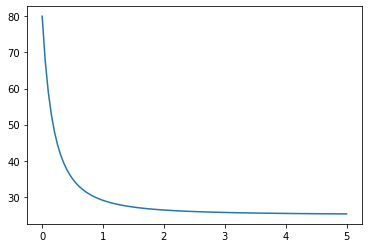

In [131]:
x = np.linspace(0, 5, 100)
I = k / (x + c)**2 + b

plt.plot(x, I)

### Comment on Model 2.1

Model 2.1 has the following characteristics:

1. it passes the measured data points
2. the rate of light intensity attenuation is propotional to the squared distance between light source and objects
3. maximum light intensity is equal to the output wattage of the light source when distance is equal to 0

Further thoughts:
1. The model only considered two factors that influence the light intensity: distance and maximum output power of the light source. Coeffcients are calculated mainly based on existing measurements. The physical meaning of its coefficients are not explained.

2. This model currently can only be used as a local model. As the distance becomes further, the intensity value is supposed to converge to 0. One reason may be the output wattage of the UV light source is not given (therefore, the input wattage of the light is considered as the output wattage. The actual value of output wattage should be lower than the input 460 watt)

3. The equation for solving coefficient c is worth further investigating. If the equation can be proved to always have a positive root the model could be more reliable.

# UVC Irradiance

In [58]:
camera = [1, 1, 1]
radius = 10

mesh_cylinder = o3d.geometry.TriangleMesh.create_cylinder(radius=0.15, height=0.5)
mesh_cylinder.compute_vertex_normals()
mesh_cylinder.translate(camera)
mesh_cylinder.paint_uniform_color([0.1, 0.9, 0.1])

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd_cam = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([mesh, pcd_cam, mesh_cylinder])

Get all points that are visible from given view point
Visualize result


In [59]:
o3d.visualization.draw_geometries([mesh, pcd_cam, mesh_cylinder])

In [60]:
Q_ = ureg.Quantity
distance = Q_(np.linalg.norm(np.asarray(pcd_cam.points)-np.array(camera), axis=1), 'feet')

In [61]:
I = k * (1 / np.square(distance.to('meter'))) + b
i = I / (4 * np.pi * (distance.to('meter')**2))

In [63]:
i.magnitude.max()

73.13658702659441

# Point Cloud Color

In [37]:
pc = o3d.geometry.PointCloud()

point_set = np.array([(x, 0, 0) for x in np.linspace(0, 5, 100)])

pc.points = o3d.utility.Vector3dVector(point_set)

red = colour.Color('red')
blue = colour.Color('blue')

colors = [x.rgb for x in list(red.range_to(blue,100))]
pc.colors = o3d.utility.Vector3dVector(colors)

print(pc)
o3d.visualization.draw_geometries([pc])

geometry::PointCloud with 100 points.


In [ ]:
o3d.visualization.draw_geometries([])